In [1]:
import pandas
import os
well_descriptions = pandas.read_csv(os.path.relpath("../../CS231Nproject/well_summary_A1_e0891BSA_all.csv"), sep=',', header=0)
print(well_descriptions.head())
print(well_descriptions.shape)

   well id  day  median pixel intensity  mw_area shape  hyst1 area  hyst2 area
0        0    0                   125.0           7830         512         418
1        1    0                   125.0           8265        3044        3008
2        2    0                   127.0           8280          30           0
3        3    0                   128.0           8096         121           0
4        4    0                   128.0           8544          82           0
(67200, 6)


In [2]:
import seaborn
seaborn.distplot(well_descriptions['hyst2 area'], hist=True, kde=True, color = "purple")

(67104, 6)
(4800,)


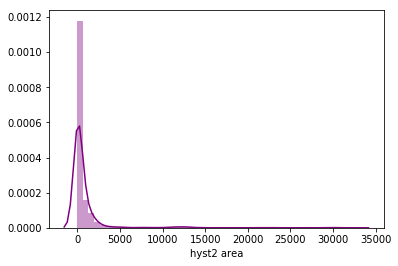

In [3]:
# subset data to those that are sensible
well_descriptions = well_descriptions[well_descriptions['hyst2 area'] < 193*193]
print(well_descriptions.shape)

final_well_ids = well_descriptions['well id'][well_descriptions['day'] == 13]
print(final_well_ids.shape)
seaborn.distplot(well_descriptions['hyst2 area'][well_descriptions['day'] == 13], hist=True, kde=True, color = "purple")

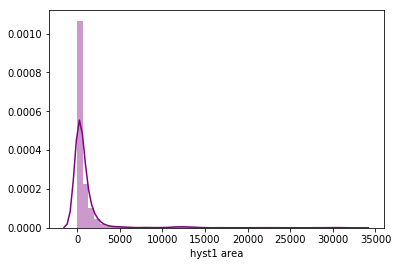

In [4]:
seaborn.distplot(well_descriptions['hyst1 area'][well_descriptions['day'] == 13], hist=True, kde=True, color = "purple")

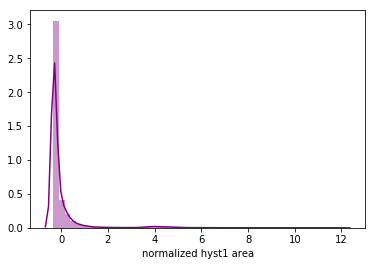

In [5]:
well_descriptions['normalized hyst1 area'] = (well_descriptions['hyst1 area'] - well_descriptions['hyst1 area'].mean())/well_descriptions['hyst1 area'].std()
seaborn.distplot(well_descriptions['normalized hyst1 area'], hist=True, kde=True, color = "purple")

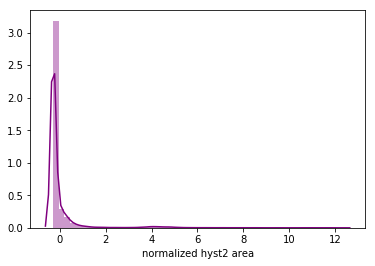

In [6]:
well_descriptions['normalized hyst2 area'] = (well_descriptions['hyst2 area'] - well_descriptions['hyst2 area'].mean())/well_descriptions['hyst2 area'].std()
seaborn.distplot(well_descriptions['normalized hyst2 area'], hist=True, kde=True, color = "purple")

In [7]:
import numpy as np
print(well_descriptions['normalized hyst2 area'].max())
print(well_descriptions['normalized hyst2 area'].min())

12.325145875975796
-0.3044706284672516


In [8]:
# I think we want to keep the min to be zero, so I'm gonna define the normalized area to be just divided by std
well_descriptions['normalized hyst1 area'] = well_descriptions['hyst1 area']/well_descriptions['hyst1 area'].std()
well_descriptions['normalized hyst2 area'] = well_descriptions['hyst2 area']/well_descriptions['hyst2 area'].std()

In [9]:
well_descriptions.to_csv("processed_well_descriptions.txt", sep = "\t", header = True)